# **Represented by :- Ahmed Elsayed Salama**


# **1 - What is the input?**

There are **4 files** with **.json** format

The **File** Contains ( **7 Features** )

---------------------------------------------

# **2 - What is the output?**

-> **Convert  json** files into dataframe (Useful data).

--------------------------------------------

# **3 - What data mining function is required?**

-> **clean** our input data to get the desired knowledge .

-> **Data mining** generally refers to examining a large amount of data to extract valuable information. The data mining process uses predictive models based on existing and historical data to project potential outcome for business activities and transactions.

--------------------------------------------------

# **4 - What could be the challenges?**

1 - **Decribe** the dataset .

2- **Check** the Quality of dataSet .

4- **Handling** the  Noise . 

5- **Interact** with json file  .



-----------------------------------------

# **5 - What is the impact?**
 -> So ,  We need to know the places that **have the higest percentage of rubbish**



# **Import Libraries**

In [41]:
from zipfile import ZipFile
import pandas as pd
import glob
import missingno as msno
from sklearn.impute import SimpleImputer
import numpy as np
from geopy.point import Point
from geopy.geocoders import Nominatim
import pandas as pd
from shapely.geometry import Point
! pip install geopandas
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 35.8 MB/s 
     |████████████████████████████████| 6.3 MB 48.5 MB/s 
     |████████████████████████████████| 16.7 MB 525 kB/s 


# **Connection to Kaggle**

In [21]:
# download and unzip the dataset
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!kaggle datasets download -d ahmedsalamas/tasks-tagaddod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
tasks-tagaddod.zip: Skipping, found more recently modified local copy (use --force to force download)


# **Extract ZipFile(Tasks)**

In [22]:
# extract ziplfile
zip = ZipFile('/content/tasks-tagaddod.zip')
zip.extractall('data')
zip.close()

In [23]:
train_files = glob.glob("../content/data/*.json")
# load json file using pandas
data = pd.DataFrame()
for count,ele in enumerate(train_files,len(train_files)):
    data = pd.concat([data, pd.read_json(ele, orient ='index',)])
# Save dataset as CSV File
data.to_csv("our_new_dataset_file.csv",index=False)

data=pd.read_csv("/content/our_new_dataset_file.csv")

In [24]:
data.head()

device_id   latitude  longitude           snapshot_datetime  \
0  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:06:42.373120   
1  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:06:47.379586   
2  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:06:52.473970   
3  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:06:57.308858   
4  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:07:02.335482   

  meta-data  collector_id  destination_request_id  
0       NaN           NaN                     NaN  
1       NaN           NaN                     NaN  
2       NaN           NaN                     NaN  
3       NaN           NaN                     NaN  
4       NaN           NaN                     NaN

# **Now our data is ready for work !**

## **Let's dive in Data Analytics**

# **Describe the Types of each column in the dataset**

In [25]:
data.dtypes # the type of each column

device_id                  object
latitude                  float64
longitude                 float64
snapshot_datetime          object
meta-data                  object
collector_id              float64
destination_request_id    float64
dtype: object

# **Dataset Shape**

In [26]:
data.shape # Dataset Shape

(22187, 7)

## **- Missing Values**

In [27]:
data.isna().sum()  # here represent how much data are missing

device_id                   652
latitude                     67
longitude                    67
snapshot_datetime             5
meta-data                 22186
collector_id                320
destination_request_id    12601
dtype: int64

## **Part1 :- Check The Quality of dataset :-**

We can check the quality of dataset by finding Dublicated items in our dataSet

In [28]:
# Select all duplicate rows based on all columns
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
# Print the raw Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [device_id, latitude, longitude, snapshot_datetime, meta-data, collector_id, destination_request_id]
Index: []

## **There are no dublicates !**

##**Matrix Plot**
We used msno to detect the flow of missing data and detect the type of missing values .


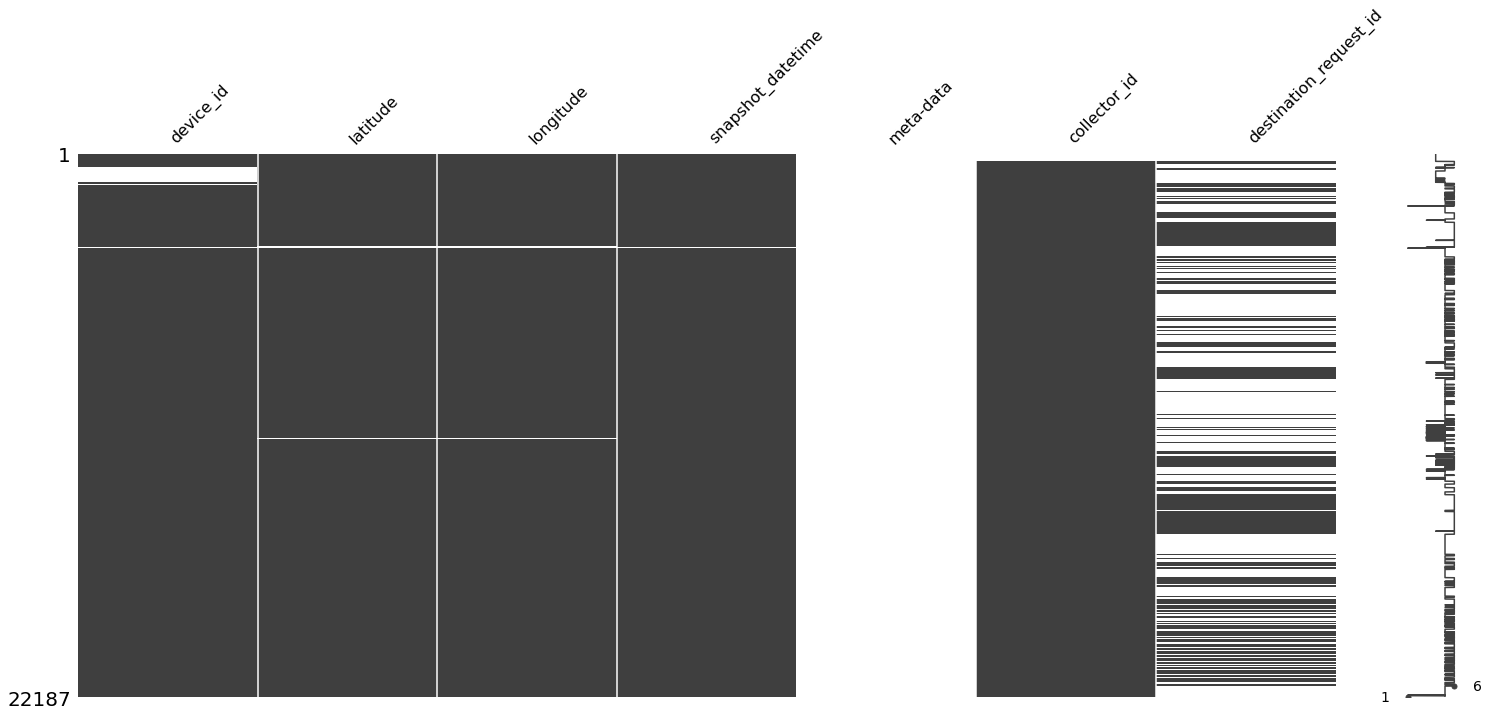

In [29]:
msno.matrix(data) # here we used Matrix Plot to check if Are there any variables often missing together 
 

# **- According to graph**
- **meta-data** column  ( **missing completely at random** ) and there are 22186 missing **so we can drop this column** .

- **destination_request_id** column  ( **missing completely at random** ) and there are 12601 missing **so we can drop this column  because we see it's not add any value** .
- **device_id** column ( **missing completely at random** ) so we can **drop** or using **Imputer** to handle these gaps .

- lat and lang columns  **missing not at random** ) , so they lost together we can drop or using imputer.

# **1- Handle meta-data and destination_request_id columns**
We will drop them  

In [30]:
data.drop(["meta-data","destination_request_id"], inplace=True, axis=1)
data.head()

device_id   latitude  longitude           snapshot_datetime  \
0  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:06:42.373120   
1  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:06:47.379586   
2  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:06:52.473970   
3  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:06:57.308858   
4  fe175d9955fced88  30.042313   31.33642  2022-01-05 16:07:02.335482   

   collector_id  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

#**2- Handle rest of columns**

1- We can use **imputer** 

2- Using **dropna**

**- We will use dropna to drop nans** 

In [31]:
data.dropna( inplace=True) # Drop nan values

In [32]:
# if you use imputer function
#imputer = SimpleImputer(missing_values = np.nan,
#                        strategy ='most_frequent')
#imputer.fit_transform(data)

In [33]:
data.head()

device_id   latitude  longitude           snapshot_datetime  \
317  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:44:55.580832   
318  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:44:58.542545   
319  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:45:02.506523   
320  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:45:07.468889   
321  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:45:13.568982   

     collector_id  
317          51.0  
318          51.0  
319          51.0  
320          51.0  
321          51.0

In [34]:
data.isna().sum()  # Here represent how much data are missing

device_id            0
latitude             0
longitude            0
snapshot_datetime    0
collector_id         0
dtype: int64

# **- Now our data dose not have any dublicated or missing values .**

# **- Now let's work on columns to get important deails form dataset**

# **- According to large data set i decided to get sample of data to save our time**

I will choose the first **1500** records and work on them because funtion geolocation need more time so we apply an idea also :) 

# **1 - Convert lat and lang to real address**
- **City**.
- **State**.
- **Postcode**.
- **country_code**.
- **Country**.
- **Road**.

In [35]:
listofJson=[]
sample=data[:1500] # work on 1500  
geolocator = Nominatim(user_agent="geoapiExercises")
for i in range (len(sample["collector_id"])):
  location = geolocator.reverse(str(sample["latitude"].iloc[i])+","+str(sample["longitude"].iloc[i]))
  listofJson.append(location.raw['address'])
  
dfItem = pd.DataFrame.from_records(listofJson,columns=["city","state","postcode","country_code","country","road"])




In [36]:
dfItem.head()

city  state postcode country_code country       road
0  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى
1  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى
2  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى
3  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى
4  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى

# **2- Final Dataframe**
- **Contains Address** of each one seperated in multiple column . 

- **Add all previouse column** and **merge** them .

In [37]:
dfItem["collector_id"]=data["collector_id"].iloc[:1500].values
dfItem["device_id"]=data["device_id"].iloc[:1500].values
dfItem["latitude"]=data["latitude"].iloc[:1500].values
dfItem["longitude"]=data["longitude"].iloc[:1500].values
dfItem["snapshot_datetime"]=data["snapshot_datetime"].iloc[:1500].values

In [38]:
dfItem.head()

city  state postcode country_code country       road  collector_id  \
0  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى          51.0   
1  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى          51.0   
2  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى          51.0   
3  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى          51.0   
4  أسيوط  أسيوط    71524           eg     مصر  حارة عشرى          51.0   

          device_id   latitude  longitude           snapshot_datetime  
0  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:44:55.580832  
1  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:44:58.542545  
2  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:45:02.506523  
3  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:45:07.468889  
4  b8e1d679ea29c711  27.204013  31.174785  2022-01-13 09:45:13.568982

## **3- Visualization the lat and lang on real map**

In [72]:
fig=px.scatter_geo(dfItem,lon='longitude', lat='latitude',
                  
                      opacity=0.5,
                      
                      projection="natural earth")

fig.update_traces(hovertemplate =dfItem["country"]+" "++dfItem["road"]+" "+dfItem["state"]+" "+dfItem["city"])

fig.show()


### **- Now we get more details to know where the place instead of lat and lang and  visualize the dataset in dataframe.**

###**-  Now we can detect the Highest city Has rubbish that may help in putting more recycle bins .**

# **- I can deploy this app as moblile app and build the server for backend if you need**

# **Thank you for your effort for correcting that**